# Tutorial for creating Hovmöller diagrams

In this tutorial we show how to create Hovmöller diagrams by using an example of precipitation in the region of North India.

In [66]:
import numpy as np
import geoutils.plotting.plots as gplt
import geoutils.geodata.base_dataset as bds
import geoutils.utils.time_utils as tu
import geoutils.tsa.time_series_analysis as tsa
import geoutils.tsa.propagation as prop
from importlib import reload

plot_dir = "/home/strnad/data/plots/tutorials/hovmoeller/"
data_dir = "/home/strnad/data/"


In [ ]:
# Load the dataset
grid_step = 2.5
dataset_file = data_dir + \
    f"climate_data/{grid_step}/mswep_pr_{grid_step}_ds.nc"

lon_range_cut = [-180, 180]
lat_range_cut = [-60, 60]

ds_pr = bds.BaseDataset(data_nc=dataset_file,
                        can=True,
                        an_types=['dayofyear', 'month', 'JJAS'],
                        lon_range=lon_range_cut,
                        lat_range=lat_range_cut,
                        )

First we plot the average precipitation over the year to get and idea

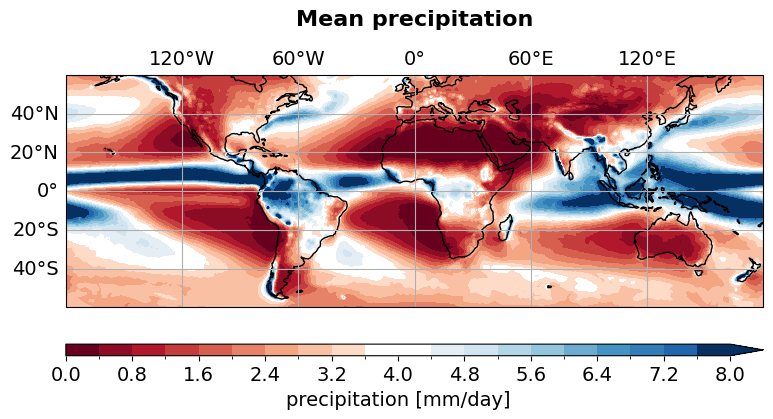

In [12]:
reload(gplt)
reload(tu)
mean_pr = tu.compute_timemean(ds_pr.ds['pr'], timemean='all')
label_pr = 'precipitation [mm/day]'
vmin_pr = 0
vmax_pr = 8
im = gplt.plot_map(mean_pr,
              title=f'Mean precipitation',
              plot_type='contourf',
              cmap='RdBu',
              levels=20,
              label=label_pr,
              vmin=vmin_pr, vmax=vmax_pr,
              tick_step=2,
              centercolor='white',
              extend='max',
              orientation='horizontal',
              )

Now we select a region in India over which we create a Hovmöller diagram that 
averages over the full year

In [48]:
reload(tu)
# This create a time series of the mean precipitation in the region per month/day
timemean='dayofyear'
yearly_mean_pr = tu.compute_timemean(ds_pr.ds['pr'],
                                     timemean=timemean,
                                     groupby=True)

Now create the Hovmöller diagram

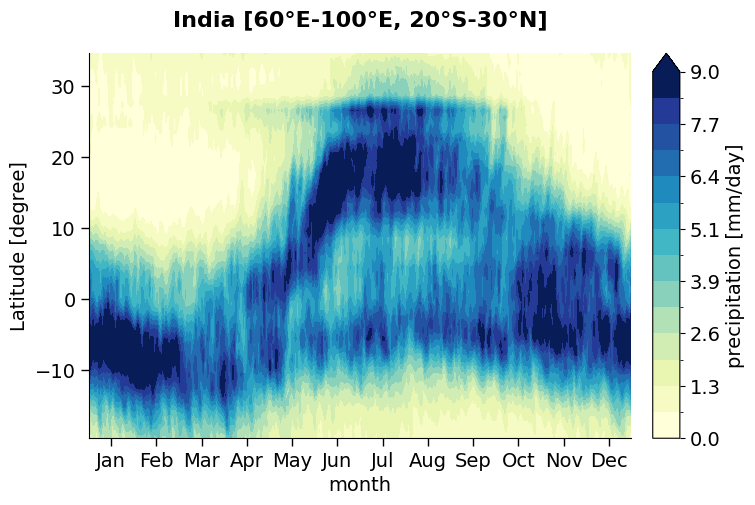

In [88]:
reload(gplt)
reload(prop)

# Dimension of the Hovmoeoller diagram
hov_dims = ['lat', 'month']
rname = 'India'
if rname == 'Sahel':
    lon_range = [-20, 50]
    lat_range = [-30, 30]
elif rname == 'India':
    # India
    lon_range = [60, 100]
    lat_range = [-20, 35]


hov_diagram = prop.get_hovmoeller(yearly_mean_pr,
                                  lon_range=lon_range,
                                  lat_range=lat_range,
                                  hov_dims=hov_dims)

# Now plot the Hovmoeller diagram
lats = hov_diagram['lat']
vtimes = hov_diagram[timemean]
label = 'precipitation [mm/day]'
vmin_pr = 0
vmax_pr = 9
xticks = np.linspace(np.min(vtimes)+15, np.max(vtimes)-15, 12)

im = gplt.plot_2D(x=vtimes, y=lats,
                  z=hov_diagram,
                  levels=14,
                  y_title=1.05,
                  title=f'{rname} [60°E-100°E, 20°S-30°N]',
                  orientation='vertical',
                  cmap='YlGnBu',
                  plot_type='contourf',
                  vmin=vmin_pr, vmax=vmax_pr,
                  ylabel='Latitude [degree]',
                  xlabel='month',
                  label=label,
                  xticklabels=tu.months,
                  xticks=xticks,
                  tick_step=2,
                  extend='max',
                  )
savepath = plot_dir + f'hovmoeller_diagram_{rname}.png'
gplt.save_fig(savepath=savepath)